In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

642

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=257b844c0cc5720c680b7f610db0f588


In [10]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
   

In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | tiksi
Processing Record 2 of Set 13 | fort saint james
Processing Record 3 of Set 13 | high level
Processing Record 4 of Set 13 | rikitea
Processing Record 5 of Set 13 | pedernales
Processing Record 6 of Set 13 | qui nhon
Processing Record 7 of Set 13 | leningradskiy
Processing Record 8 of Set 13 | port alfred
Processing Record 9 of Set 13 | tabuk
Processing Record 10 of Set 13 | dzilam gonzalez
Processing Record 11 of Set 13 | luderitz
Processing Record 12 of Set 13 | praia
Processing Record 13 of Set 13 | hilo
Processing Record 14 of Set 13 | la asuncion
Processing Record 15 of Set 13 | duluth
Processing Record 16 of Set 13 | saldanha
Processing Record 17 of Set 13 | maloy
Processing Record 18 of Set 13 | busselton
Processing Record 19 of Set 13 | mataura
Processing Record 20 of Set 13 | soyo
Processing Record 21 of Set 13 | samusu
City not found. Skipping...
Processing Record 22 of Set 13 | jamestown
Processing Record 23 of Set 13 | jiroft
City not fo

Processing Record 34 of Set 16 | noyabrsk
Processing Record 35 of Set 16 | chicama
Processing Record 36 of Set 16 | pho chai
Processing Record 37 of Set 16 | vastseliina
Processing Record 38 of Set 16 | mahibadhoo
Processing Record 39 of Set 16 | bambui
Processing Record 40 of Set 16 | attawapiskat
City not found. Skipping...
Processing Record 41 of Set 16 | bambous virieux
Processing Record 42 of Set 16 | jalu
Processing Record 43 of Set 16 | iaciara
Processing Record 44 of Set 16 | dalinghe
City not found. Skipping...
Processing Record 45 of Set 16 | dwarka
Processing Record 46 of Set 16 | viedma
Processing Record 47 of Set 16 | moose factory
Processing Record 48 of Set 16 | vaitape
Processing Record 49 of Set 16 | khatanga
Processing Record 50 of Set 16 | prince rupert
Processing Record 1 of Set 17 | barrow
Processing Record 2 of Set 17 | nizwa
Processing Record 3 of Set 17 | oranjemund
Processing Record 4 of Set 17 | baturaja
Processing Record 5 of Set 17 | delano
Processing Record

Processing Record 22 of Set 20 | barentsburg
City not found. Skipping...
Processing Record 23 of Set 20 | mys shmidta
City not found. Skipping...
Processing Record 24 of Set 20 | saryagash
Processing Record 25 of Set 20 | tumannyy
City not found. Skipping...
Processing Record 26 of Set 20 | rio gallegos
Processing Record 27 of Set 20 | jumla
Processing Record 28 of Set 20 | san cristobal
Processing Record 29 of Set 20 | okha
Processing Record 30 of Set 20 | kropotkin
Processing Record 31 of Set 20 | pocao de pedras
Processing Record 32 of Set 20 | saint george
Processing Record 33 of Set 20 | iralaya
Processing Record 34 of Set 20 | poum
Processing Record 35 of Set 20 | kuching
Processing Record 36 of Set 20 | bakersfield
Processing Record 37 of Set 20 | amazar
Processing Record 38 of Set 20 | oktyabrskiy
Processing Record 39 of Set 20 | narsaq
Processing Record 40 of Set 20 | nemuro
Processing Record 41 of Set 20 | hualmay
Processing Record 42 of Set 20 | yar-sale
Processing Record 43

Processing Record 1 of Set 24 | nampula
Processing Record 2 of Set 24 | ranong
Processing Record 3 of Set 24 | half moon bay
Processing Record 4 of Set 24 | paramonga
Processing Record 5 of Set 24 | sao filipe
Processing Record 6 of Set 24 | severodvinsk
Processing Record 7 of Set 24 | cayenne
Processing Record 8 of Set 24 | ilinskiy
Processing Record 9 of Set 24 | srednekolymsk
Processing Record 10 of Set 24 | salalah
Processing Record 11 of Set 24 | namibe
Processing Record 12 of Set 24 | batagay-alyta
Processing Record 13 of Set 24 | maykain
City not found. Skipping...
Processing Record 14 of Set 24 | khonuu
City not found. Skipping...
Processing Record 15 of Set 24 | sangar
Processing Record 16 of Set 24 | abu samrah
Processing Record 17 of Set 24 | contai
Processing Record 18 of Set 24 | tawkar
City not found. Skipping...
Processing Record 19 of Set 24 | hobyo
Processing Record 20 of Set 24 | nome
Processing Record 21 of Set 24 | hastings
Processing Record 22 of Set 24 | invermere

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tiksi,71.6872,128.8694,42.64,95,100,13.49,RU,2022-07-31 22:09:58
1,Fort Saint James,54.4333,-124.2500,85.71,29,26,7.94,CA,2022-07-31 22:09:58
2,High Level,58.5169,-117.1360,70.05,41,84,5.46,CA,2022-07-31 22:09:58
3,Rikitea,-23.1203,-134.9692,71.94,75,100,21.97,PF,2022-07-31 22:09:59
4,Pedernales,18.0384,-71.7440,91.38,49,48,20.13,DO,2022-07-31 22:09:59
5,Qui Nhon,13.7667,109.2333,78.15,88,99,7.14,VN,2022-07-31 22:10:00
6,Leningradskiy,69.3833,178.4167,50.77,63,51,6.11,RU,2022-07-31 22:10:00
7,Port Alfred,-33.5906,26.8910,53.47,74,21,12.10,ZA,2022-07-31 22:10:00
8,Tabuk,17.4189,121.4443,74.91,92,100,1.92,PH,2022-07-31 22:10:01
9,Dzilam Gonzalez,21.2833,-88.9333,87.80,61,89,10.67,MX,2022-07-31 22:10:01


In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

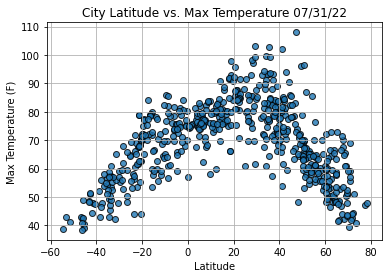

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

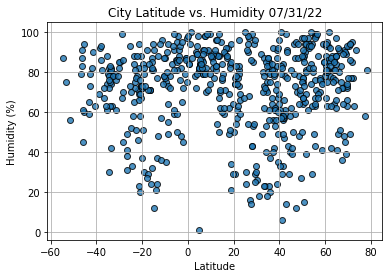

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

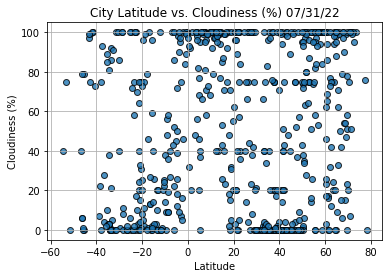

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

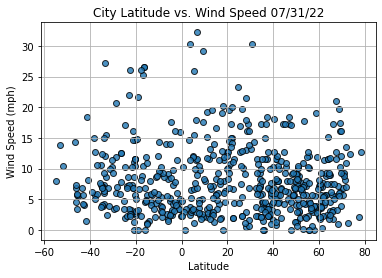

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
index13 = city_data_df.loc[13]

In [20]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3      False
4       True
       ...  
577    False
578     True
579     True
580     True
581     True
Name: Lat, Length: 582, dtype: bool

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tiksi,71.6872,128.8694,42.64,95,100,13.49,RU,2022-07-31 22:09:58
1,Fort Saint James,54.4333,-124.2500,85.71,29,26,7.94,CA,2022-07-31 22:09:58
2,High Level,58.5169,-117.1360,70.05,41,84,5.46,CA,2022-07-31 22:09:58
4,Pedernales,18.0384,-71.7440,91.38,49,48,20.13,DO,2022-07-31 22:09:59
5,Qui Nhon,13.7667,109.2333,78.15,88,99,7.14,VN,2022-07-31 22:10:00
...,...,...,...,...,...,...,...,...,...
576,Zaozhuang,34.8647,117.5542,77.41,87,2,2.04,CN,2022-07-31 22:25:48
578,Lerwick,60.1545,-1.1494,53.60,81,26,8.14,GB,2022-07-31 22:25:49
579,Bin Qirdan,33.1378,11.2197,83.08,62,0,5.79,TN,2022-07-31 22:25:50
580,Butembo,0.1500,29.2833,57.11,98,97,2.28,CD,2022-07-31 22:25:50


In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tiksi,71.6872,128.8694,42.64,95,100,13.49,RU,2022-07-31 22:09:58
1,Fort Saint James,54.4333,-124.2500,85.71,29,26,7.94,CA,2022-07-31 22:09:58
2,High Level,58.5169,-117.1360,70.05,41,84,5.46,CA,2022-07-31 22:09:58
4,Pedernales,18.0384,-71.7440,91.38,49,48,20.13,DO,2022-07-31 22:09:59
5,Qui Nhon,13.7667,109.2333,78.15,88,99,7.14,VN,2022-07-31 22:10:00


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

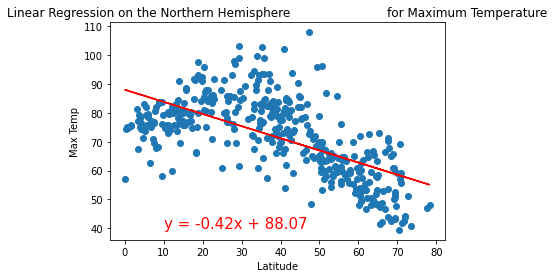

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

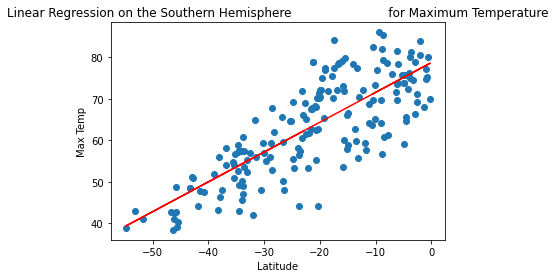

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

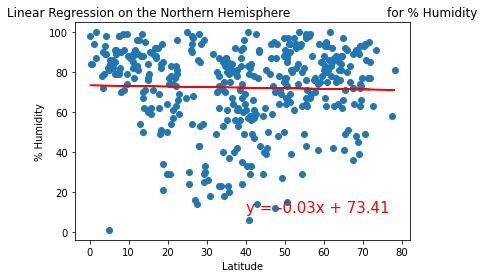

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

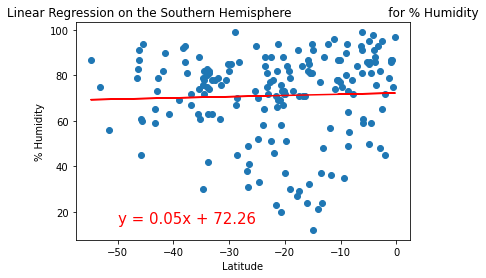

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

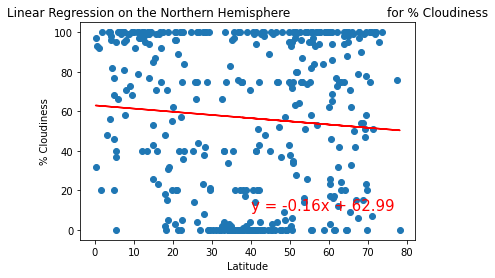

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

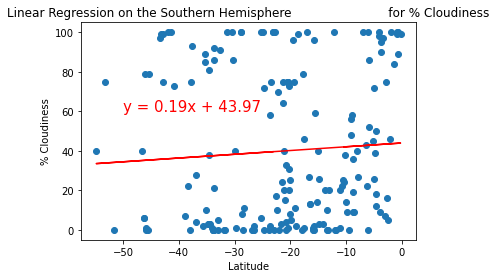

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

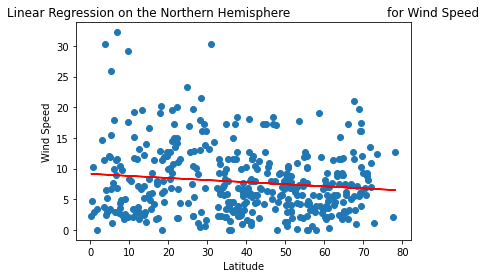

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

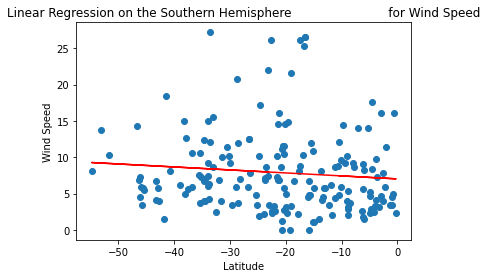

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [32]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [33]:
# Import the dependencies.
import pandas as pd
import gmaps
import requests
# Import the API key.
from config import g_key

In [34]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("C:/Users/Richard Pamintuan/Documents/Data Analyst Class Docs/Class Folder/World_Weather_Analysis/weather_data/cities.csv")
city_data_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,Tiksi,71.6872,128.8694,42.64,95,100,13.49,RU,2022-07-31 22:09:58
1,1,Fort Saint James,54.4333,-124.2500,85.71,29,26,7.94,CA,2022-07-31 22:09:58
2,2,High Level,58.5169,-117.1360,70.05,41,84,5.46,CA,2022-07-31 22:09:58
3,3,Rikitea,-23.1203,-134.9692,71.94,75,100,21.97,PF,2022-07-31 22:09:59
4,4,Pedernales,18.0384,-71.7440,91.38,49,48,20.13,DO,2022-07-31 22:09:59


In [35]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=g_key)

In [36]:
# 1. Assign the locations to an array of latitude and longitude pairs.
locations = [latitude, longitude]
# 2. Assign the weights variable to some values.
temperatures = # an array of length equal to the locations array length
# 3. Assign the figure variable to the gmaps.figure() attribute.
fig = gmaps.figure()
# 4. Assign the heatmap_layer variable to the heatmap_layer attribute and add in the locations.
heatmap_layer = gmaps.heatmap_layer(locations, weights=temperatures)

# 5. Add the heatmap layer.
fig.add_layer(heatmap_layer)
# 6. Call the figure to plot the data.
fig

SyntaxError: invalid syntax (3185543972.py, line 4)

In [37]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
# Assign the figure variable.
fig = gmaps.figure()
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp)
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig



Figure(layout=FigureLayout(height='420px'))

In [38]:
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
temps = []
for temp in max_temp:
    temps.append(max(temp, 0))